In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(c,t):
    return np.maximum(0.5*c*np.cos(2*np.pi*t/366.0)+(1-0.5*c), 1-c*0.8)

In [3]:
x = np.linspace(0,366, 366)

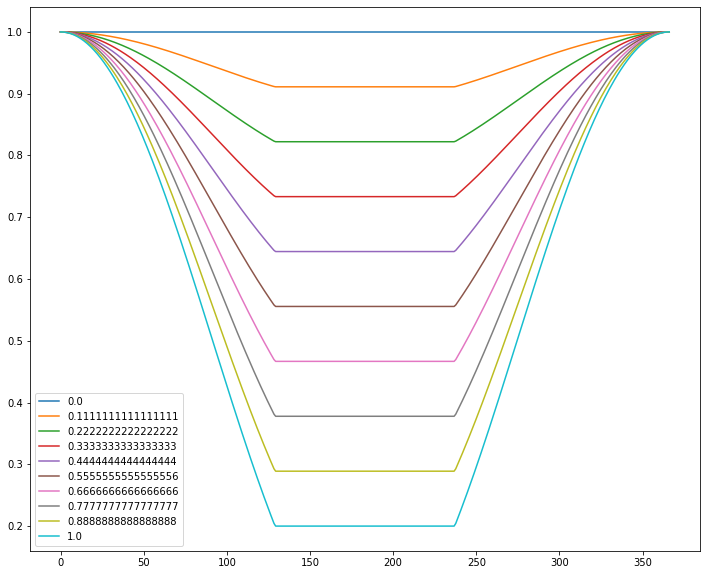

In [4]:
plt.figure(figsize=(12,10))
for c in np.linspace(0,1,10):
    y = f(c, x)
    plt.plot(x,y, label=f"{c}")

plt.legend()

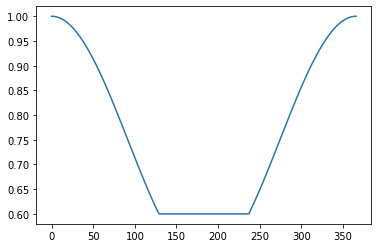

In [5]:
y = f(0.5, x)
plt.plot(x,y, label=f"{c}")

In [6]:
months = [31,28,31,30,31,30, 31, 31,30,31,30,31]
print(sum(months), sum(months[:1]), sum(months[:8]), sum(months[:12]))

365 31 243 365


# Age mtx

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("../input/hun/hun_contact.csv", sep=',|:', engine='python', header=None, index_col=0)
df = df.fillna(0)

In [9]:
df

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,,,,,,,,,,,,,,,,,,,,,
reference,8.087300,0.769500,0.783542,1.088160,0.948646,0.330376,0.125868,0.000000,2.150602,22.039652,...,0.776131,0.500000,0.030334,0.030869,0.470035,0.433298,0.617016,0.326502,0.116204,1.000000
04_2020,0.425591,0.261418,0.113991,0.238081,0.050772,0.012157,0.004691,0.000000,0.587161,0.775759,...,0.351661,0.000000,0.000000,0.032264,0.018849,0.135979,0.069950,0.025847,0.253472,0.500000
05_2020,0.319978,0.333747,0.120856,0.249501,0.119930,0.017925,0.003316,0.007577,0.720979,0.752990,...,0.242799,0.164234,0.003187,0.006705,0.057933,0.004897,0.069787,0.033106,0.048605,0.152798
06_2020,0.458727,0.684286,0.081276,0.276620,0.107062,0.076625,0.020817,0.000000,1.002905,1.797737,...,0.395633,0.350731,0.004750,0.012101,0.065490,0.043814,0.078036,0.108031,0.047429,0.151679
08_2020,0.869175,0.502623,0.201485,0.394382,0.154650,0.141584,0.046050,0.022101,0.661849,2.401514,...,0.314403,0.195362,0.028147,0.057444,0.226547,0.057334,0.101231,0.129473,0.022052,0.099628
09_2020,3.075301,0.840118,0.211781,0.412377,0.218772,0.021296,0.010154,0.000000,2.029366,8.667630,...,0.226082,0.172979,0.081887,0.046497,0.061009,0.186031,0.167216,0.031675,0.035202,0.242933
10_2020,4.005731,0.859001,0.368346,0.249831,0.094691,0.053998,0.000000,0.000000,1.904344,9.828060,...,0.287365,0.000000,0.029957,0.025092,0.224742,0.088982,0.246713,0.076513,0.052297,0.000000
11_2020,0.392193,0.380573,0.044775,0.258174,0.086368,0.170345,0.020263,0.000000,0.741267,4.120908,...,0.260035,0.240455,0.000000,0.008371,0.018791,0.113888,0.055390,0.061065,0.083350,0.000000
12_2020,0.422612,0.393243,0.126908,0.268453,0.151648,0.071386,0.013256,0.000000,1.217110,5.251399,...,0.276118,0.000000,0.000000,0.000000,0.069636,0.021104,0.297089,0.072204,0.018455,0.000000


In [10]:
months = list(df.iloc[:,0].index)

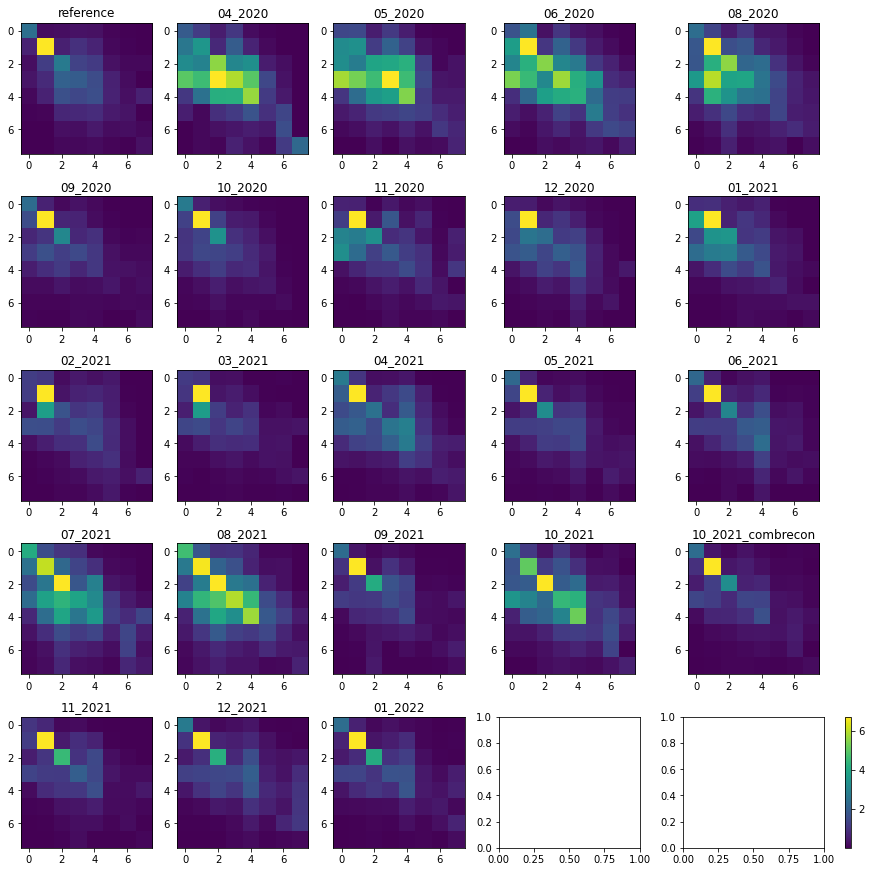

In [11]:
fig,axs = plt.subplots(5,5, figsize=(12,12), constrained_layout=True)

base = df.loc["reference"].to_numpy()+0.001
for i,date in enumerate(months):
    mtx = df.loc[date].to_numpy()
    #mtx = (mtx/base).reshape(8,8)
    mtx = (mtx).reshape(8,8)
    #im = axs[i//5, i%5].imshow(np.log(np.maximum(mtx, 0.0001)), vmin=0, vmax=np.log(22))
    im = axs[i//5, i%5].imshow(mtx)
    axs[i//5, i%5].set_title(date)

plt.colorbar(im)
plt.show()

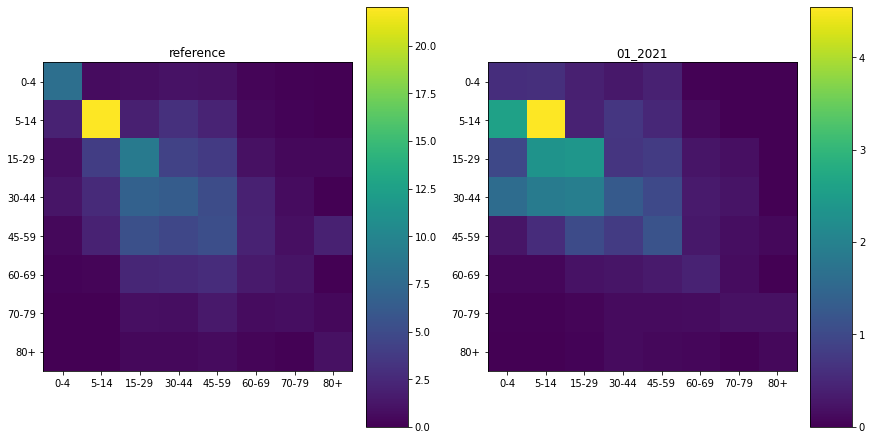

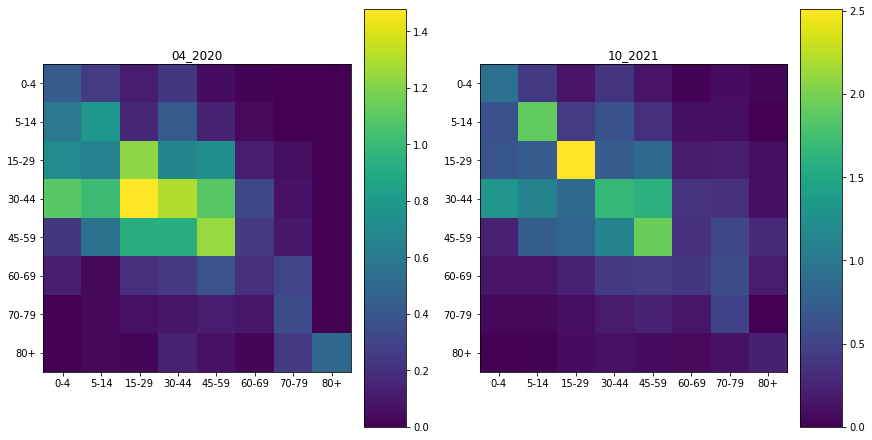

In [12]:
def set_ticks(ax):
    ticks = range(8)
    labels = ["0-4", "5-14", "15-29", "30-44", "45-59", "60-69", "70-79", "80+"]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)    

fig,axs = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)
for ax,label in zip(axs, ["reference", "01_2021"]):
    mtx = df.loc[label].to_numpy().reshape(8,8)
    im = ax.imshow(mtx)
    set_ticks(ax)
    ax.set_title(label)
    plt.colorbar(im, ax = ax)

plt.show()

fig,axs = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)
for ax,label in zip(axs, ["04_2020", "10_2021"]):
    mtx = df.loc[label].to_numpy().reshape(8,8)
    im = ax.imshow(mtx)
    set_ticks(ax)
    ax.set_title(label)
    plt.colorbar(im, ax = ax)

plt.show()

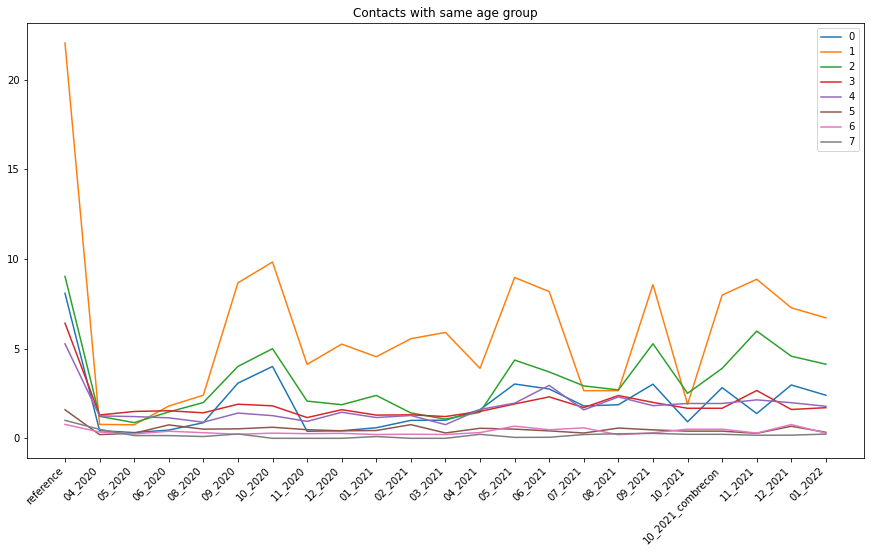

In [13]:
plt.figure(figsize=(15,8))
x = df.iloc[:,0].index
for i in range(0,8):
    plt.plot(x, df.iloc[:,i*8+i], label=f"{i}")
plt.title(f"Contacts with same age group")
plt.legend()
plt.xticks(x, rotation=45, ha="right")
plt.show()

In [14]:
"""
for j in range(0,8):
    plt.figure(figsize=(12,8))
    x = df.iloc[:,0].index
    for i in range(0,8):
        plt.plot(x, df.iloc[:,j*8+i], label=f"{i}")
    plt.title(f"Age group: {j}")
    plt.legend()
    plt.xticks(x, rotation=45, ha="right")
    plt.show()
""";

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [16]:
d = json.load(open("../input/hun/contacts_home.json"))
K = int(d['K'])
mtx_home = np.zeros((K,K))
for d1 in d['rates']:
    mtx_home[d1["from"]][d1["to"]] = d1['rate']
    
d = json.load(open("../input/hun/contacts_other.json"))
K = int(d['K'])
mtx_other = np.zeros((K,K))
for d1 in d['rates']:
    mtx_other[d1["from"]][d1["to"]] = d1['rate']

In [17]:
def set_ticks(ax):
    ticks = range(16)
    labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60", "60-65", "65-70", "70-75", "75+"]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels)    

def plot_mtx(ax, mtx, title):
    im = ax.imshow(mtx)
    ax.set_title(title)
    set_ticks(ax)
    plt.colorbar(im, ax = ax)

def repeat_hun(month):
    mtx = df.loc[month].to_numpy().reshape(8,8)
    mtx = np.repeat(mtx, [1,2,3,3,3,2,2,1], axis=0)
    mtx = np.repeat(mtx, [1,2,3,3,3,2,2,1], axis=1)
    return mtx

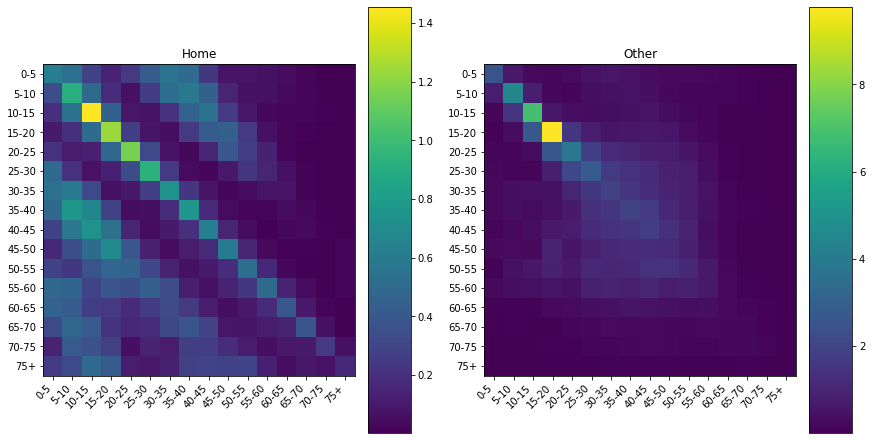

In [18]:
fig,axs = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)
plot_mtx(axs[0], mtx_home, "Home")
plot_mtx(axs[1], mtx_other, "Other")
plt.show()

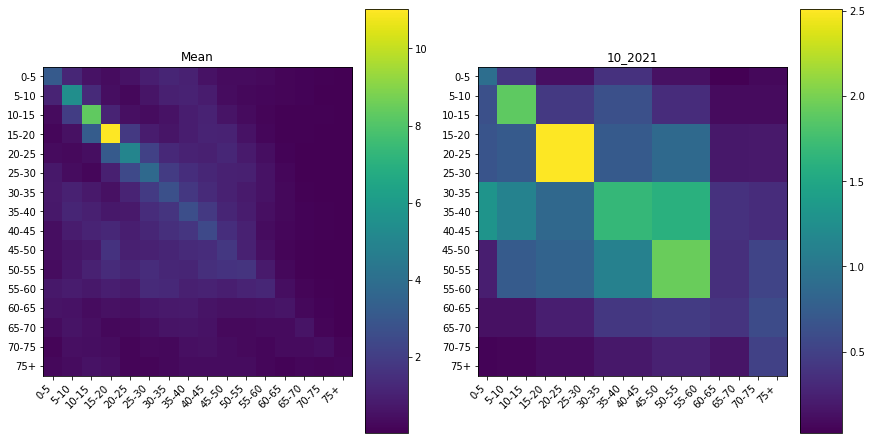

In [19]:
fig,axs = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)
plot_mtx(axs[0], (mtx_home+mtx_other), "Mean")
plot_mtx(axs[1], repeat_hun("10_2021")[:-1,:-1], "10_2021")
plt.show()

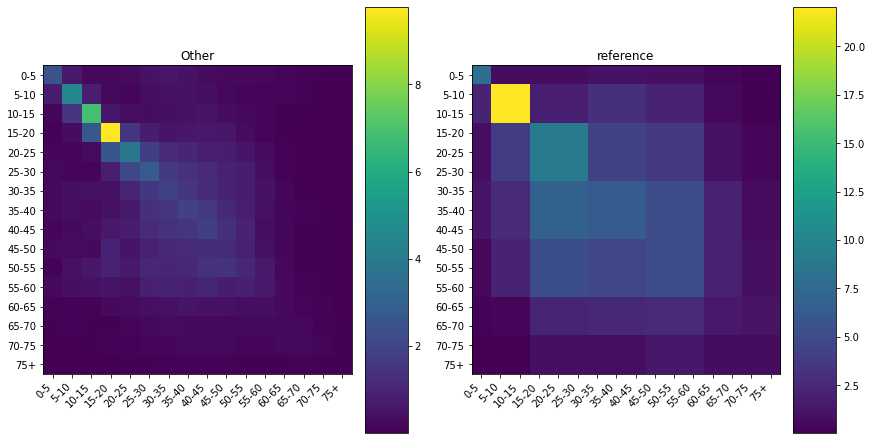

In [20]:
R = np.mean(mtx_other)/np.mean(repeat_hun("reference")[:-1,:-1])
fig,axs = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)
plot_mtx(axs[0], mtx_other, "Other")
plot_mtx(axs[1], repeat_hun("reference")[:-1,:-1], "reference")
plt.show()

In [21]:
np.mean(mtx_other)

0.5782198399972657

In [22]:
def write_contact_mtx(mtx, K, ind):
    d = {"K":K, "rates":[]}
    for i in range(K):
        for j in range(K):
            d["rates"].append({"from":i, "to":j, "rate":mtx[i,j]})
    with open(f'../input/hun/contacts_other{ind}.json', 'w') as outfile:
        json.dump(d, outfile)

for i,label in enumerate(["reference", "04_2020", "01_2021", "10_2021"]):
    mtx = repeat_hun(label)[:-1,:-1]
    R = np.mean(mtx_other)/np.mean(mtx)
    print(label, "==>", R, np.mean((R)*mtx))
    write_contact_mtx(R*mtx, 16, i)
    
write_contact_mtx(np.mean(mtx_other)*np.ones((16,16)), 16, 4)

reference ==> 0.1841793319613243 0.5782198399972658
04_2020 ==> 1.1078298659904786 0.5782198399972656
01_2021 ==> 0.7529597618547027 0.5782198399972658
10_2021 ==> 0.8091703166278491 0.5782198399972658
